In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Excercise I
The Ricker model (Ricker 1954) is a population dynamic model that is often used in
fishery management. It can be expressed by the following equation:
$$
    N_{t+1} = N_te^{r \left( 1 - \frac{N_t}{k} \right)}
$$

Where :
- $r$ is the growth rate,
- $k$ is the carrying capacity of the environment

## Question I-A
Use the graphical method to get some first insights into the behavior of this model.
(You can use R or Python to plot the function, diagonal and lines) 

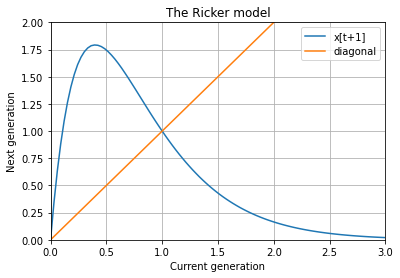

In [6]:
# Generate the signal arrays
T = 3 # The range of evaluation
N = 100 # The number of data
diagonal = np.array([x for x in range(T)])
xt = np.linspace(0, T, N, dtype="float16")
xt_1 = np.zeros(N, dtype="float16")
# General parameters
r = 2.5
k = 1
# Apply the model to the generations
for t, x in enumerate(xt):
    xt_1[t] = x * np.exp( r * (1 - x / k))
# Plot the results
plt.title("The Ricker model")
plt.plot(xt, xt_1)
plt.plot(diagonal)
plt.xlim(0, T)
plt.ylim(0, T - 1)
plt.ylabel("Next generation")
plt.xlabel("Current generation")
plt.legend(["x[t+1]", "diagonal"], loc="upper right")
plt.grid()

## Question I-B
What are the equilibria of this model?

### Answer: 
First of all, we can make the model simpler by making the size of the population relative to the parameter $k$, we have to apply the following procedure:
$$
    N_{t+1} = N_t e^{r \left( 1 - \frac{N_t}{k} \right)}; \; 
    x_t := \frac{N_t}{k} \\
    \therefore \; x_{t + 1} = x_t e^{r \left( 1 - x_t \right)}; \\
$$

In order to find the equilibria of the model, we have to find the values of $x$ for which the following condition is true.
$$
    f( \hat{x} ) = \hat{x} \\
    \therefore \; \hat{x} e^{r \left( 1 - \hat{x} \right)} = \hat{x} 
$$

For this, we get the next two points of equilibrium:
$$
    \hat{x}_1 = 0; \hat{x}_2 = 1 \\
    \therefore \; \hat{N}_1 = 0; \hat{N}_2 = k
$$

## Question I-C
Determine the stability of the equilibria.

### Answer:
The derivative of the model $f'(x)$ is shown as follows:
$$
    f(x) = x e^{r \left( 1 - x \right)} \; \therefore \\
    f'(x) = e^{r \left( 1 - x \right)} \left( 1 - r x \right)
$$

Using the equilibriums obtained in [Question B](#question-i-b), we apply them to the derivative as follows:
$$
    f'(x)|_{\hat{x}_{1, 2}} = 
    \begin{cases}
        e^{r(1 - \hat{x}_1)} \left( 1 - r \hat{x}_1 \right), \; \hat{x}_1 = 0 \\
         e^{r(1 - \hat{x}_2)} \left( 1 - r \hat{x}_2 \right), \; \hat{x}_2 = 1
    \end{cases} \; \therefore \\
    f'(x)|_{\hat{x}_{1, 2}} = 
    \begin{cases}
        e^r, \; \hat{x}_1 = 0 \\
        1 - r, \; \hat{x}_2 = 1
    \end{cases}
$$

Considering this result, we can state that:
- For $\hat{x}_1$:
  - The equilibrium is stable for $r < 0$.
  - The equilibrium is unstable for $r > 0$.
- For $\hat{x}_2$:
  - The equilibrium is stable for $0 < r < 2$.
  - The equilibrium is unstable if $r > 2$ or $r < 0$.
  - The equilibrium oscillates for $r > 1$.

> Given the case of the equilibrium point $\hat{x}_1 = 0$, we can conclude that this is an asymptotic equilibrium. In order to reach it, a negative growth rate would be necessary, meaning that the population would decrease each generation.

## Question I-D
Plot the model and corroborate graphically your results of
equilibria and stability (explain the examples you present, and how they prove your
findings).

### Answer:
In the past plot we can observe the three states of stability of the Ricker model.
- The **blue** line represents the stable equilibrium, in which the form of the model smoothly reaches the equilibrium point of $\hat{x}_2$.
- The **orange** line represents the stable equilibrium with oscillations, in which the model reaches the equilibrium point and oscillates for a number of generations, finally converging to it.
- The **green** line represents the unstable equilibrium, which shows a chaotic behavior of the model for all generations.

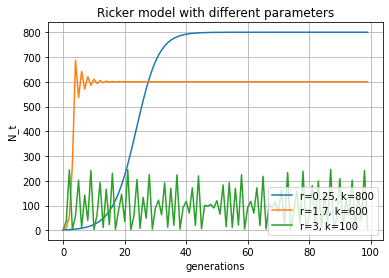

In [7]:
def ricker_model(generations: int, params: tuple[float], initial_condition: float | int = 1) -> np.ndarray:
    '''> The function takes in the number of generations, the parameters, and the initial condition and
    returns the Ricker model
    
    Parameters
    ----------
    generations : int
        The number of generations to simulate
    params : tuple[float]
        tuple[float] = (r, k)
    initial_condition : float | int
        The initial population size
    
    Returns
    -------
        A numpy array containing the Ricker model simulation for the given parameters.
    
    '''
    Nt = np.zeros(generations, dtype="float64") # Generate the model array according to the generations
    Nt[0] = initial_condition # Set the initial conditions
    r, k = params
    for t in range(generations - 1):
        Nt[t + 1] = Nt[t] * np.exp(r * (1 - (Nt[t] / k))) ## Ricker difference equation
    return Nt

n_generations = 100
signals = list()
params_group = [
    (0.25, 800),
    (1.7, 600),
    (3, 100)
]

for params in params_group:
    signals.append(ricker_model(n_generations, params, 2))

for signal in signals:
    plt.plot(signal)

plt.title("Ricker model with different parameters")
plt.xlabel("generations")
plt.ylabel("N_t")
plt.grid()
plt.legend([f"r={params[0]}, k={params[1]}" for params in params_group], loc="lower right")

## Question I-E
How does this model compare to the logistic model?

### Answer:
This model presents a resemblance to the logistic growth model in that there is an equilibrium representing the maximum value, as well as an asymptotic behavior when the populations size is reaching the equilibrium point. The main difference stands with the natural exponential factor addressed to the model while the logistic growth model shows a geometrical behavior.

# Excercise II
During our class, the simple natural selection model assumed that there is only a
single, closed population in which the dynamics take place. One extension of this
model that relaxes this assumption might assume that there is a continuous migration
from another population consisting of only B type individuals (A type being implicit).
This new extended model can be described by the recursion equation:
$$
    p_{t + 1} = m + (1 - m) \left[ \frac{(1 + s) p_t}{1 + s p_t} \right]
$$

## Question II-A
Provide an intuitive explanation for this equation and the new parameter $m$.
### Answer:
The parameter $m$ may refer to a constant _migration_ rate, in which new individuals enter the population at a fixed rate and individuals leave the population at the same rate for each generation.

## Question II-B
What are the equilibria of this model?
### Answer:
Given the condition for equilibria $f(\hat{p}) = \hat{p}$, we part for the following procedure.
$$
    \hat{p} = m + (1 - m) \left[ \frac{(1 + s) \hat{p}}{1 + s \hat{p}} \right] \\
    1 = m + (1 - m) \left( \frac{1 + s}{1 + s \hat{p}} \right) \\
    1 - m = (1 - m) \left( \frac{1 + s}{1 + s \hat{p}} \right) \\
    1 = \left( \frac{1 + s}{1 + s \hat{p}} \right) \; \therefore \; \hat{p} = 1
$$
For this model there are no other equilibrium points whatsoever, due to the addition of the parameter $m$, the addition of new population at a fixed rate makes it imposible to obtain different equilibria in the current model.

## Question II-C
Determine the stability of the equilibria.
### Answer:
In order to determine the stability of the equilibria we have to take into account the derivative of $f(p)$, given by the next equation.
$$
    f'(p) = (1 - m) \left[ \frac{(1 + s) (1 + sp) - sp (1 +s)}{(1 + sp)^2} \right] \; \therefore \\
    f'(p) = \frac{(1 - m) (1 + s)}{(1 + sp)^2}
$$
Considering the sole equilibrium point for this model that we computed in [Question B](#question-ii-b), we apply the equilibrium point to $f'(p)$ as follows. 
$$
    f'(\hat{p}) = f'(1) \; \therefore \\
    f'(1) = \frac{1 - m}{1 + s}
$$
Considering the result of the equilibrium applied to $f'(p)$, we conclude that:
- The equilibrium is stable for the condition $|m| < |s + 2|$.
- The equilibrium is unstable for all $|m| > |s + 2|$.
- The equilibrium presents oscillations for $m > 1$.

## Question II-D
Use the graphical method to gain additional insights into your model and compare
the plot with your analytical results.

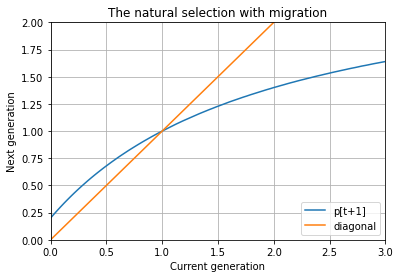

In [8]:
pt = np.linspace(0, T, N, dtype="float16")
pt_1 = np.zeros(N, dtype="float16")
# General parameters
m = 0.2
s = 0.5
# Apply the model
for t, p in enumerate(pt):
    pt_1[t] = m + (1 - m) * (((1 + s) * p) / (1 + s * p))
# Plot the results
plt.title("The natural selection with migration")
plt.plot(pt, pt_1)
plt.plot(diagonal)
plt.xlim(0, T)
plt.ylim(0, T - 1)
plt.xlabel("Current generation")
plt.ylabel("Next generation")
plt.legend(["p[t+1]", "diagonal"], loc="lower right")
plt.grid()


## Question II-E
How does migration impact the dynamics compared to the simpler, one population
model?
### Answer:
The migration parameter represents a constant incoming of new population, eliminating the posibility that the model converges to an inferior value $\hat{p} = 0$.